# Decision Tree
Build a decison tree to predict the quality of github profiles

In [10]:
#imports
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
#Read dataset
data = pd.read_csv('../data/gitrater.csv',index_col=0)
print(len(data))
data.head()

230


,repos,stars,followers,following,foll_ratio,lang,n_lang,org_flag,n_cont,last_cont,stab_cont,cont_repo_ratio,r1,r2,y
0,71,306,106,9,11.78,"{'Rust', 'Ruby', 'Shell', 'JavaScript', 'HTML'...",10,1,437,0,0.25,6,3.5,4.5,4.0
1,0,0,0,1,0.00,set(),0,0,1,159,0.00,0,0.0,0.0,0.0
2,12,1,182,0,0.00,"{'Ruby', 'Shell', 'JavaScript', 'PHP', 'CSS'}",5,0,433,3,0.23,36,4.0,3.0,4.0
3,13,31,0,17,0.00,"{'JavaScript', 'HTML', 'PHP'}",3,0,20,0,0.50,2,2.0,2.0,2.0
4,99,344,370,16,23.12,"{'Jupyter Notebook', 'Shell', 'JavaScript', 'H...",10,0,255,6,0.02,3,5.0,3.0,4.0


In [16]:
X = data[['repos','stars','followers','following','foll_ratio','n_lang','org_flag','n_cont','last_cont','stab_cont','cont_repo_ratio']]
y = data['y']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=30,random_state = 100)

In [18]:
# Fitting the model
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

             precision    recall  f1-score   support

        0.0       1.00      0.60      0.75         5
        1.0       0.56      0.71      0.63         7
        2.0       0.50      0.44      0.47         9
        3.0       0.25      0.20      0.22         5
        4.0       0.50      1.00      0.67         2
        5.0       1.00      1.00      1.00         2

avg / total       0.59      0.57      0.56        30



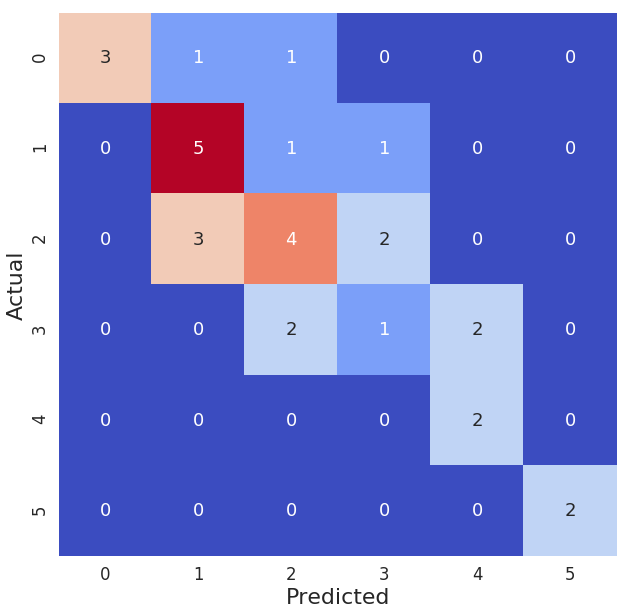

In [19]:
# Prediction and evaluation
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

#Create confusion matrix
lang = [0, 1, 2, 3, 4, 5]
conf_matrix = confusion_matrix(y_test,predictions)
conf_matrix_df = pd.DataFrame(conf_matrix,columns=lang,index=lang)

#Plot confusion matrix heatmap
plt.figure(figsize=(10, 10), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(conf_matrix_df,cmap='coolwarm',annot=True,fmt='.5g',cbar=False)
plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

plt.savefig('../figures/model_eval.png',format='png',dpi=150)